In [1]:
import pandas as pd
import numpy as np
import fnmatch 
import os 

In [109]:
def read_ratings(filespath='../data/small_dataset/'):
    pattern = 'revs_*.csv'
    print('Pattern :', pattern )

    files = os.listdir(filespath) 
    dfs_files = []
    for name in files: 
        if fnmatch.fnmatch(name, pattern):
            dfs_files.append(name)
    dfs_files
    dfs_paths = []
    for file in dfs_files:
        dfs_paths.append(filespath + file)

    revs_lst = []
    for file in dfs_paths:
        try:
            revs_lst.append(pd.read_csv(file, usecols=[1,2,3]))
        except:
            print(f'file {file} failed')
    print(len(revs_lst))
    revs_df = pd.concat(revs_lst,axis=0)
#     revs_df['UserID'] = revs_df.user_link.astype('category').cat.codes
#     revs_df.info()
#     revsdf = revs_df[['isbn','UserID','ranking']]
#     ratings_df = revsdf.rename(columns={"ranking":"Rating", 'isbn':'ISBN'})

#     #droping raws with UserID == 0
#     ratings_df.drop(ratings_df[ratings_df['UserID']==0].index, axis=0,inplace=True)
#     ratings_df.drop(ratings_df[ratings_df['Rating']==0].index, axis=0,inplace=True)
    
    return revs_df

In [71]:
ratings_s_df = read_ratings()
len(ratings_s_df['ISBN'].unique())

Pattern : revs_*.csv
file ../data/small_dataset/revs_1594205221.csv failed
93
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18550 entries, 0 to 59
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   isbn       18550 non-null  object
 1   user_link  18550 non-null  object
 2   ranking    18550 non-null  int64 
 3   UserID     18550 non-null  int16 
dtypes: int16(1), int64(1), object(2)
memory usage: 615.9+ KB


93

In [33]:
len(ratings_s_df['ISBN'].unique())

93

In [11]:
ratings_df.describe()

,UserID,Rating
count,4406.000000,4406.000000
mean,6913.781207,3.960508
std,4002.581711,1.027558
min,5.000000,1.000000
25%,3527.000000,3.000000
50%,6845.000000,4.000000
75%,10373.750000,5.000000
max,13928.000000,5.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc3d666dd90>,
      dtype=object)

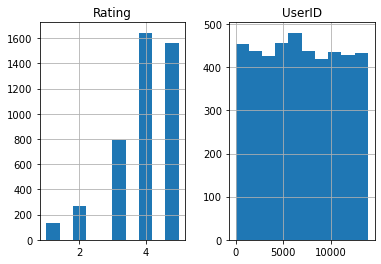

In [13]:
ratings_s_df.hist()

In [138]:
ratings_b_df = read_ratings('../data/big_dataset/')

Pattern : revs_*.csv
974


In [133]:
ratings_b_df['UserID'] = ratings_b_df.user_link.astype('category')#.cat.codes
ratings_b_df.info()
ratings_b_df = ratings_b_df[['isbn','UserID','ranking']]
ratings_b_df = ratings_b_df.rename(columns={"ranking":"Rating", 'isbn':'ISBN'})

#droping raws with UserID == 0
ratings_b_df.drop(ratings_b_df[ratings_b_df['UserID']==0].index, axis=0,inplace=True)
ratings_b_df.drop(ratings_b_df[ratings_b_df['Rating']==0].index, axis=0,inplace=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 72047 entries, 0 to 59
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   isbn       72047 non-null  object  
 1   user_link  72047 non-null  object  
 2   ranking    72047 non-null  int64   
 3   UserID     72047 non-null  category
dtypes: category(1), int64(1), object(2)
memory usage: 4.1+ MB


In [149]:
ratings_b_df[ratings_b_df['isbn']==0]

,isbn,user_link,ranking
0,0,http://goodreads.com/user/show/1742824-jason-k...,4
1,0,http://goodreads.com/user/show/25353295-carmen,4
2,0,http://goodreads.com/user/show/282633-emily,5
3,0,http://goodreads.com/user/show/7481492-margitte,4
4,0,http://goodreads.com/user/show/22600410-cathrine,4
...,...,...,...
295,0,http://goodreads.com/user/show/58159462-tori-pfau,3
296,0,http://goodreads.com/user/show/23807620-lisa-s...,5
297,0,http://goodreads.com/user/show/56234968-karrie,3
298,0,http://goodreads.com/user/show/2551190-loretta,5


In [145]:
ratings_b_df['user_link'].unique()

array(['http://goodreads.com/user/show/89336018-ujjawal-sureka',
       'http://goodreads.com/user/show/3655942-rakhi-dalal',
       'http://goodreads.com/user/show/74953959-aakanksha', ...,
       'http://goodreads.com/user/show/4759882-farzana',
       'http://goodreads.com/user/show/46465480-william-smith',
       'http://goodreads.com/user/show/1002389-aerin'], dtype=object)

In [120]:
ratings_b_df[ratings_b_df['UserID']==0]

,ISBN,UserID,Rating
4,1599869942,0,4
19,142004413,0,5
4,0,0,4
16,525427570,0,4
8,0,0,4
1,1401309666,0,5
28,62301233,0,5
32,0,0,0
17,076790818X,0,5
9,0,0,4


In [74]:
filespath='../data/big_dataset/'
pattern = 'revs_*.csv'
print('Pattern :', pattern )

files = os.listdir(filespath) 
dfs_files = []
for name in files: 
    if fnmatch.fnmatch(name, pattern):
        dfs_files.append(name)
dfs_files
dfs_paths = []
for file in dfs_files:
    dfs_paths.append(filespath + file)

revs_dfs = []

Pattern : revs_*.csv


In [75]:
len(dfs_paths)

974

In [105]:
revs_lst = []
for file in dfs_paths:
    revs_lst.append(pd.read_csv(file, usecols=[1,2,3]))

revs_df = pd.concat(revs_lst,axis=0)
# print(len(revs_df['isbn'].unique()))
# print(len(revs_df['isbn']))
# revs_df['UserID'] = revs_df.user_link.astype('category').cat.codes
# revs_df.info()
# revsdf = revs_df[['isbn','UserID','ranking']]
# ratings_df = revsdf.rename(columns={"ranking":"Rating", 'isbn':'ISBN'})
# #droping raws with UserID == 0
# ratings_df.drop(ratings_df[ratings_df['UserID']==0].index, axis=0,inplace=True)
# ratings_df.drop(ratings_df[ratings_df['Rating']==0].index, axis=0,inplace=True)a

In [108]:
len(revs_df['isbn'].unique())

924